# How to embed an image into a Jupyter notebook markdown cell

 * Creator(s): Chris Slocum
 * Affiliation: NOAA Center for Satellite Applications and Research
 * History:
     * 4 April 2023 — initial version

---


## Overview

In creating an effective notebook, content from external sources is useful to assist the reader in understanding the material. Often, this content is from graphical material (e.g., an image or schematic). However, including graphics into a notebook is easier said than done. This notebook provide recommendations on how to embed graphics in notebook via Base64 encoding.

### Prerequisite

To successfully complete this notebook, a basic understanding of the following is helpful but not necessary.
* Markdown language syntax
* Python programming standard library

### Learning Outcome

* Embed images into Jupyter notebook

---

## Adding graphics to notebooks

There are four ways to add graphics to a Jupyter notebook:
1. Markdown (e.g., ``![alternative text](URL-to-image/Path-to-image)``)
2. HTML (e.g., ``<img src="URL-to-image/Path-to-image" alt="Alternative text" />``)
3. IPython (e.g., ``from IPython import display; display.Image("URL-to-image/Path-to-image"``)
4. Base64 encoding

The first three require that the image be accessible on a remote server or that the image be saved locally. The former has a permanency issue, and the latter depends on the place hosting the notebook.

To avoid these limitations, we will use the Base64 encoding option. This option converts the graphic binary from the native image format (e.g., png, gif, jpeg) and converts it into ASCII characters. To do this, we will walk through an example.

### Using Base64 encoding
For our example, we will use the following remote image file hosted on an HTTPS web server (in this case, tropical cyclone centric longwave infrared satellite from the Regional and Mesoscale Meteorology Branch of the NOAA Center for Satellite Applications and Research).

``https://rammb-data.cira.colostate.edu/tc_realtime/products/storms/2023sh17/4kmirimg/2023sh17_4kmirimg_202303311800.gif``

Using the HTML rendering in the markdown cell, this image renders as shown below.

<figure>
    <img src="https://rammb-data.cira.colostate.edu/tc_realtime/products/storms/2023sh17/4kmirimg/2023sh17_4kmirimg_202303311800.gif" alt="Himawari-9 infrared imagery of Cyclone Herman on 1800 UTC 31 March 2023" />
    <figcaption>Himawari-9 infrared imagery of Cyclone Herman on 1800 UTC 31 March 2023 from the remote server (Credit: NOAA/STAR Tropical Cyclone Characteristics Team).</figcaption>
</figure>

### Reading the file

To read this file into Python, we will use the `urlopen` function from the [urllib.request](https://docs.python.org/3/library/urllib.request.html) module from the Python standard library.

In [ ]:
# get the urlopen function
from urllib.request import urlopen
# define the url for out image
url = "https://rammb-data.cira.colostate.edu/tc_realtime/products/storms/2023sh17/4kmirimg/2023sh17_4kmirimg_202303311800.gif"
# use the `with` statement to make the request and read the file contents
with urlopen(url) as response:
    contents = response.read()

Here, we opened the remote file from a web server using HTTPS protocol. But, the same can be done for a local file. The above block of code would simplify to:

```python
filename = "2023sh17_4kmirimg_202303311800.gif"
with open(filename, mode='rb') as fid:
    contents = fid.read()
```

In both cases, we'd get Python [bytes literals](https://docs.python.org/3/library/stdtypes.html#bytes) if we printed `contents`. While we need byte literals output, this format of the output is not useful for our application. Instead, we need to encode the data into a format that is understandable to the HTML `<img />` tag.


### Encoding the file contents
To encode the file, we use the `b64encode` function from the [base64](https://docs.python.org/3/library/base64.html) module in the Python standard library.

In [ ]:
# Get base64
import base64
# Encode the `contents` bytes literals using b64encode
encoded_contents = base64.b64encode(contents)

`encoded_contents` contains bytes literals using the base 64 encoding. To see the output, uncomment the print statement below.

In [ ]:
# Warning: prints a lot of text
#print(encoded_contents)

Note that you will want to do this step elsewhere and then copy the output from `encoded_contents` into your notebook. You do not want to include the snippet of code above in your actual notebook.

### Displaying the encoded contents in a Markdown cell

Recall, you will only use the output from the print statement of `encode_contents` from the section above. From that print statement, you want to copy the `encode_contents` bytes literals (i.e., the content between the ``b' '``) to include in your notebook.

In your notebook, you will use the following HTML syntax for embedding an image in a text cell:

```html
<figure>
    <img src="data:image/png;base64,the data" alt="Alternative text" />
    <figcaption>Figure caption text (Credit: <em>Add credit text</em>).</figcaption>
</figure
```
where `the data` is replaced by the long bytes literals we copied from the print statement of `encoded_contents`.


Once you've done this in your notebook, you can run the cell. In our example with the tropical cyclone image, the result should look like the embedded image below

<figure>
    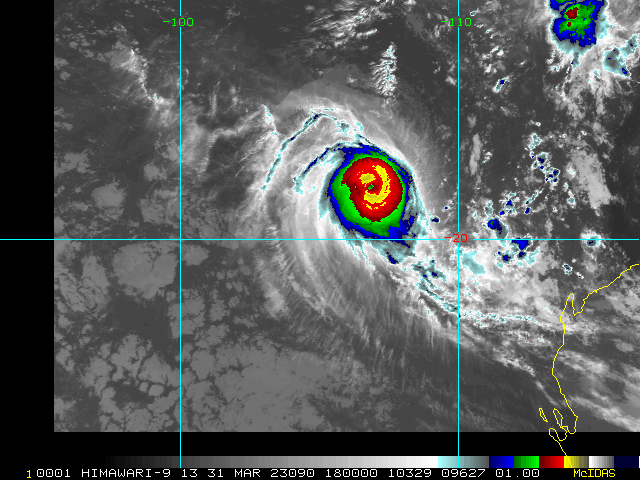
    <figcaption>Himawari-9 infrared imagery of Cyclone Herman on 1800 UTC 31 March 2023 embedded in the Jupyter notebook (Credit: NOAA/STAR Tropical Cyclone Characteristics Team).</figcaption>
</figure>

## References
* Python, 2023: The Python Standard Library. Accessed 4 April 2023, [https://docs.python.org/3/library/index.html](https://docs.python.org/3/library/index.html).

## Metadata
* Language / package(s): Python / Markdown
* Domain: general, training
* Application keywords: notebooks
* Geophysical keywords: N/A
* AI keywords: N/A

## Disclaimer
This Jupyter notebook is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, or the United States Department of Commerce. All NOAA Jupyter notebooks are provided on an 'as is' basis and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this Jupyter notebook will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.